In [105]:
[] #https://kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility?resource=download

[]

In [106]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [53]:
# Özellik Bilgisi
#1) yaş
#2) cinsiyet
#3) göğüs ağrısı tipi (4 değer)
#4) istirahat kan basıncı
#5) mg/dl cinsinden serum kolestoral
#6) açlık kan şekeri > 120 mg/dl
#7) istirahat elektrokardiyografik sonuçları (değerler 0,1) ,2)
#8) ulaşılan maksimum kalp hızı
#9) egzersizin neden olduğu anjina
#10) eski tepe = dinlenmeye göre egzersizle tetiklenen ST depresyonu
#11) egzersizin tepe noktasının eğimi ST segmenti
#12) florosopi ile renklendirilen majör damarların sayısı (0-3)
#13) tal: 0 = normal; 1 = sabit kusur; 2 = geri döndürülebilir kusur
#14) hedef: 0= daha az kalp krizi olasılığı 1= daha fazla kalp krizi olasılığı

In [107]:
# Gerekli kütüphaneleri içeri aktaracağız
# sayısal hesaplamalar için:
import numpy as np
# veri manipülasyonu ve analizi için:
import pandas as pd
# veri görselleştirmesi için:
import seaborn as sns
# Matplotlib kütüphanesinin pyplot modülünü, grafik oluşturmak için kullanırız
import matplotlib.pyplot as plt
# Seaborn'un varsayılan temasını ve stili ayarlar
sns.set()

**Veri Kümesi Açıklaması**

In [108]:
# Veri setini bir DataFrame'e yüklüyoruz.
# Bu DataFrame, Pandas kütüphanesi tarafından veri analizi ve işleme işlemlerini gerçekleştirmemizi sağlar.
df = pd.read_csv("heart.csv")

In [109]:
df.shape

(303, 14)

In [110]:
# DataFrame'den ilk birkaç satırını görüntüleme
df.head(7)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [111]:
# DataFrame'inizin genel bilgilerini görüntüleme
# sütun veri tipleri, her bir sütundaki dolu olmayan (null olmayan) değer sayısı ve DataFrame'in toplam bellek kullanımı vb.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [112]:
# her bir sayısal sütun için temel istatistiksel bilgileri içerir:
# ortalama, standart sapma, minimum değer...
df.describe()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Veri Keşfi**

In [113]:
def describe_dataset(df):
    # Sütun sayısını ve isimlerini al
    num_columns = len(df.columns)

    # Sayısal sütunları ve isimlerini belirle
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Kategorik sütunları ve isimlerini belirle
    # Her sütunun benzersiz değerlerinin sayısını kontrol et
    unique_counts = df.nunique()

    # Benzersiz değerlerin sayısı sınırlı olan sütunları bul
    categorical_columns = unique_counts[unique_counts <= 10].index.tolist()


    print('Veri Çerçevesindeki Sütun Sayısı:', num_columns)
    print('Sayısal Sütunlar:', numeric_columns)
    print("Kategorik Sütunlar:",categorical_columns)


# Fonksiyonu çağır
describe_dataset(df)



Veri Çerçevesindeki Sütun Sayısı: 14
Sayısal Sütunlar: ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
Kategorik Sütunlar: ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']


**Veri Ön İşleme**

In [114]:
# Eksik değerleri dataFrame'den kaldırıyoruz
df.dropna(inplace=True)

In [115]:
df.isnull().sum() #DataFrame'de bulunan boş değerlerin kontrol edilmesi


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [116]:
#Aykırı Değerlerin İncelenmesi
def outliers_graph(df_column):
    Q75, Q25 = np.percentile(df_column, [75 ,25])
    IQR = Q75 - Q25
    print('Q25: ',Q25)
    print('Q75: ',Q75)
    print('Inter Quartile Range: ',IQR)
    print('Outliers lie before', Q25-1.5*IQR, 'and beyond', Q75+1.5*IQR)
    print('Number of Rows with Left Extreme Outliers:', len(df[df_column <Q25-1.5*IQR]))
    print('Number of Rows with Right Extreme Outliers:', len(df[df_column>Q75+1.5*IQR]))

In [117]:
import pandas as pd

# One Hot Encoding fonksiyonu
def OneHotEncoding(df, column_name):
    # Kategorik değişkenin benzersiz değerlerinin sayısını ve veri çerçevesindeki sütun sayısını al
    unique_values = df[column_name].nunique()
    total_columns = len(df.columns)
    # One Hot Encoding sonrası beklenen toplam sütun sayısını hesapla
    finallencol = (unique_values - 1) + (total_columns - 1)
    # One Hot Encoding işlemini gerçekleştir
    dummies = pd.get_dummies(df[column_name], drop_first=True, prefix=column_name)
    # Veri çerçevesine One Hot Encoding sütunlarını ekle
    df = pd.concat([df, dummies], axis='columns')
    # Orjinal kategorik sütunu veri çerçevesinden çıkar
    df.drop(columns=column_name, axis=1, inplace=True)
    # One Hot Encoding işleminin başarılı olup olmadığını kontrol et
    if finallencol == len(df.columns):
        print(f"One Hot Encoding for {column_name} is successful")
        print('')
    else:
        print(f"One Hot Encoding for {column_name} is unsuccessful")
    # Dönüştürülen veri çerçevesini döndür
    return df

# Kategorik değişkenleri bul
def find_categorical_columns(df):
    return df.select_dtypes(include=['object', 'category']).columns

# Veri setini yükle
df = pd.read_csv("heart.csv")

# Kategorik değişkenleri bul
categorical_columns = find_categorical_columns(df)

# Her bir kategorik değişken için One-Hot Encoding işlemi
for column in categorical_columns:
    df = OneHotEncoding(df, column)

# Sonuçları kontrol etmek için veri setinin başını yazdır
print(df.head())


   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


**Veri Görselleştirme**

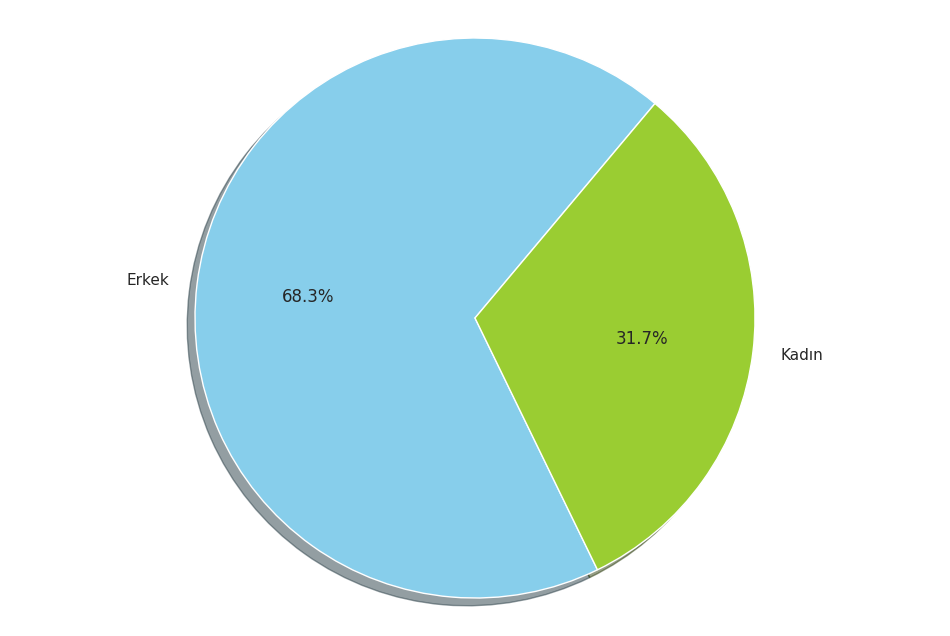

In [118]:
# 1ve 0 'ların sayısı hesaplanır
Erkek =len(df[df['sex'] == 1])
Kadın = len(df[df['sex']== 0])

plt.figure(figsize=(12,8))

# Veriyi görselleştirelim
labels = 'Erkek','Kadın'
sizes = [Erkek,Kadın]
colors = ['skyblue', 'yellowgreen']
explode = (0, 0)

# sizes' listesi ile pasta dilimlerinin boyutlarını belirler
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=50)

plt.axis('equal')
plt.show()

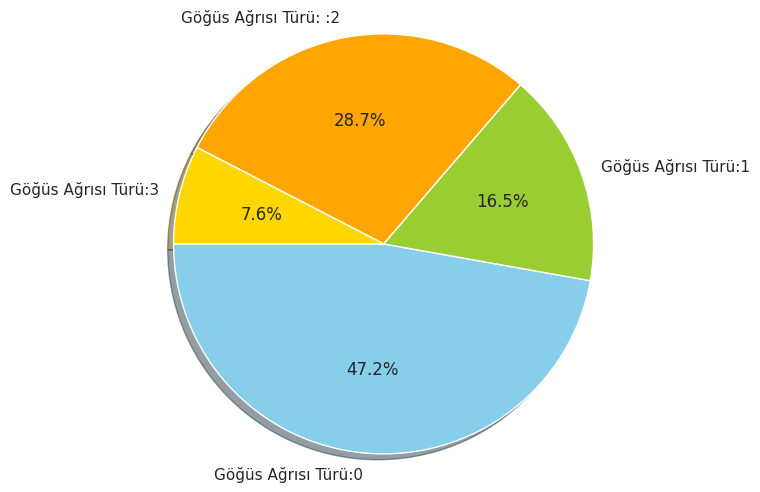

In [119]:
plt.figure(figsize=(8, 6))

labels = 'Göğüs Ağrısı Türü:0', 'Göğüs Ağrısı Türü:1', 'Göğüs Ağrısı Türü: :2', 'Göğüs Ağrısı Türü:3'
sizes = [len(df[df['cp'] == 0]),
         len(df[df['cp'] == 1]),
         len(df[df['cp'] == 2]),
         len(df[df['cp'] == 3])]
colors = ['skyblue', 'yellowgreen', 'orange', 'gold']
explode = (0, 0, 0, 0)

#Çizdirelim
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
       autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.axis('equal')
plt.show()

In [120]:
# veri setindeki değişkener arasındaki ilişkileri anlamak için ısı haritası oluşturacağız
#  çıkarılacak olan çizimin boyutunu (12x10) belirleyelim
sns.set(rc = {'figure.figsize':(12,10)})
# metin boyutunu ayarlayalım
sns.set_context("talk", font_scale=0.5)

<Axes: >

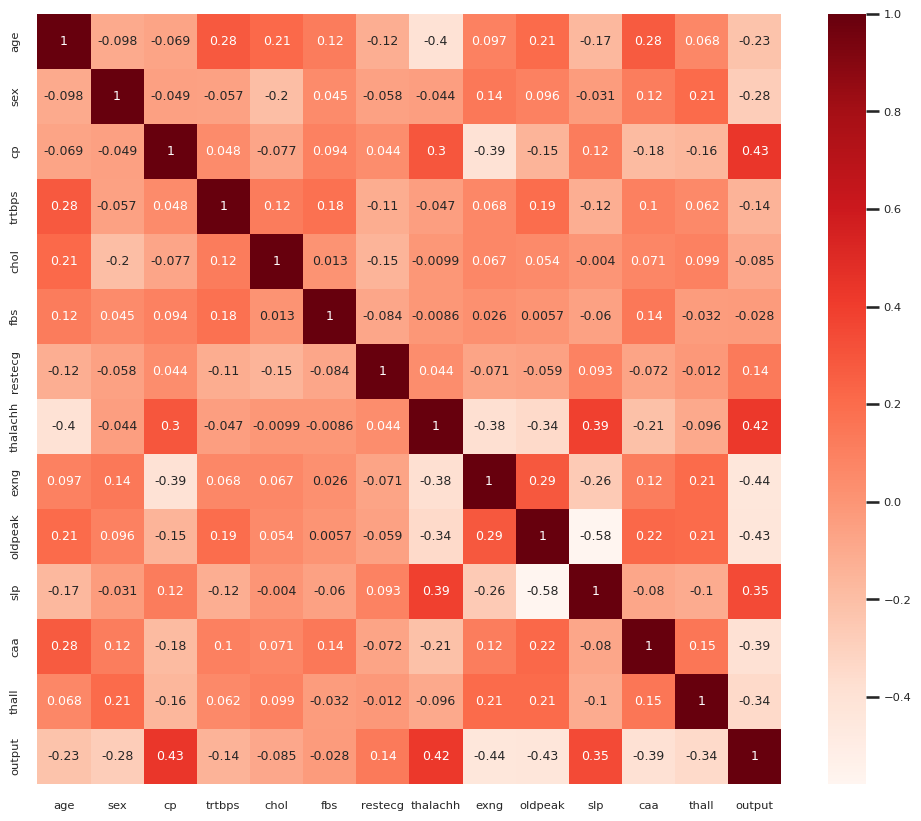

In [121]:
# sns.heatmap() ile korelasyon matrisini bir ısı haritası olarak çizilir,cmap='Reds' ile renk paleti belirlenir ve annot=True ile her bir hücreye korelasyon değerlerini eklenir
sns.heatmap(df.corr(), cmap='Reds', annot=True)

<Axes: xlabel='thall', ylabel='Count'>

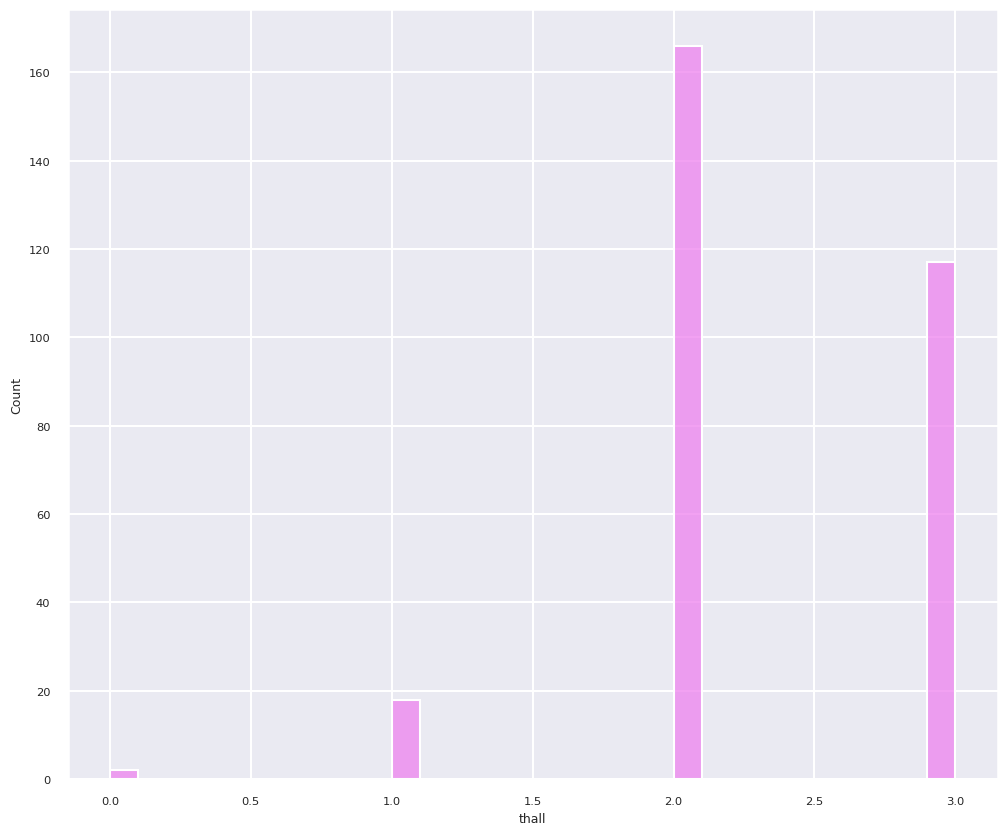

In [124]:
# Maksimum kalp atış hızı
sns.histplot(df['thall'], kde = False, bins = 30, color = 'violet')

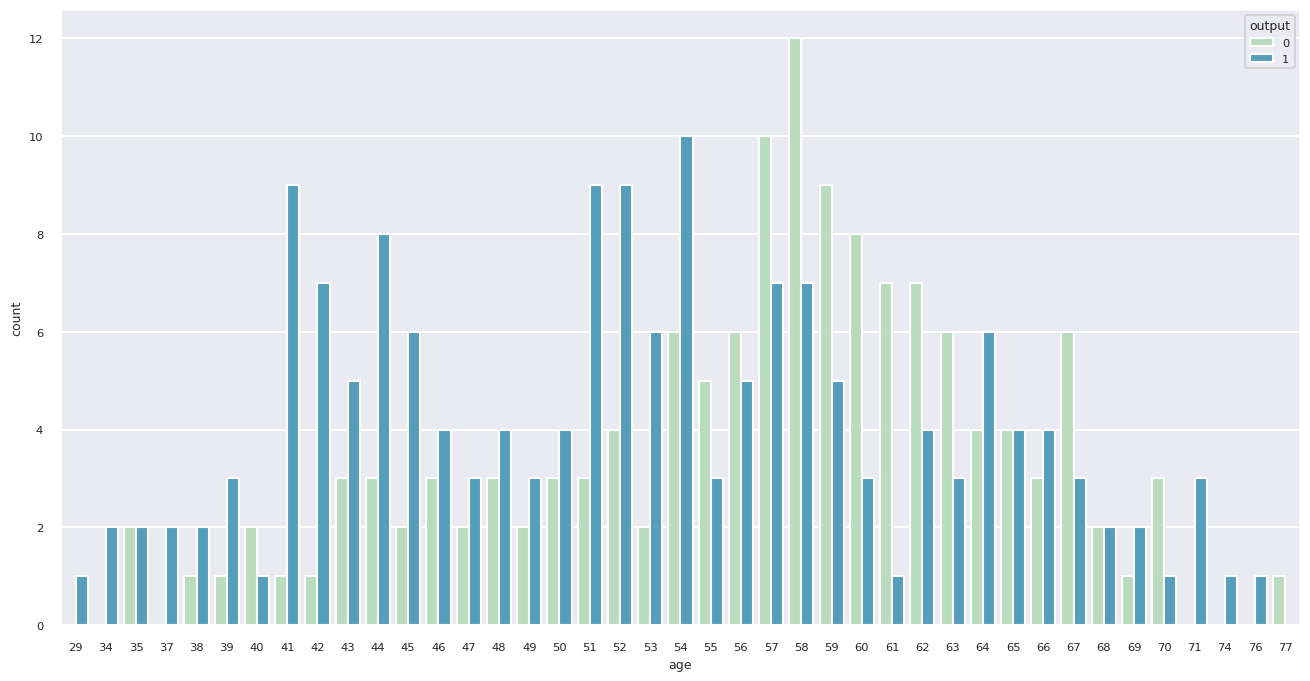

In [127]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'age', data = df, hue = 'output', palette = 'GnBu')
plt.show()

**KNN ve model karşılaştırılması**

In [128]:
# Modelinin eğitilmesi ve değerlendirilmesi için scikit-learn kütüphanesinden bazı modülleri içeri aktarıyoruz
import sklearn
# Veri ön işleme ve KNN algoritması için modüller
from sklearn import preprocessing, neighbors
# Veri setini eğitim ve test setlerine bölmek için
from sklearn.model_selection import train_test_split

In [129]:
# Veri setinden hedef değişkeni çıkararak bağımsız değişkenleri elde etmek için kullanılır.
X = df.drop("output", axis=1)
# Bağımsız değişkenleri ölçeklendirir
X = preprocessing.scale(X)
#  DataFrame'deki "target" sütununu (hedef değişkeni) y değişkenine atıyoruz
y = df['output']

In [130]:
# Eğitim ve test verilerinin bağımlı ve bağımsız değişkenleri tanımlanır
# train_test_split fonksiyonu kullanılarak X ve y veri setleri %30'luk test oranıyla ayrılır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [153]:
# neighbors modülünden KNN sınıflandırıcı modelini oluşturulur
# Herhangi bir parametre belirtilmediğinde, varsayılan olarak K=5 kullanılır.
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
#fit yöntemi, modelin eğitim veri setine uyarlanmasını sağlanır
# süreç, modelin içindeki parametreleri ayarlayarak ve veri setindeki desenleri öğrenerek gerçekleşir
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [154]:
# Eğitilmiş modelin veri seti üzerindeki tahminlerini gerçek etiketlerle karşılaştırarak doğruluk skorunu hesaplanır
accuracy = clf.score(X_train, y_train)
print("Accuracy", accuracy)

Accuracy 0.8584905660377359


In [155]:
# Her bir test örneği için, model tarafından yapılan tahmini ve gerçek etiketler karşılaştırılır
for X,y in zip(X_test, y_test):
	print(f"Tahmin Edilen Hedef:{clf.predict([X])[0]}, Gerçek Hedef: {y}")


Tahmin Edilen Hedef:1, Gerçek Hedef: 1
Tahmin Edilen Hedef:1, Gerçek Hedef: 0
Tahmin Edilen Hedef:0, Gerçek Hedef: 0
Tahmin Edilen Hedef:0, Gerçek Hedef: 0
Tahmin Edilen Hedef:0, Gerçek Hedef: 0
Tahmin Edilen Hedef:1, Gerçek Hedef: 1
Tahmin Edilen Hedef:1, Gerçek Hedef: 0
Tahmin Edilen Hedef:1, Gerçek Hedef: 1
Tahmin Edilen Hedef:0, Gerçek Hedef: 0
Tahmin Edilen Hedef:1, Gerçek Hedef: 1
Tahmin Edilen Hedef:0, Gerçek Hedef: 0
Tahmin Edilen Hedef:1, Gerçek Hedef: 1
Tahmin Edilen Hedef:1, Gerçek Hedef: 0
Tahmin Edilen Hedef:0, Gerçek Hedef: 0
Tahmin Edilen Hedef:0, Gerçek Hedef: 0
Tahmin Edilen Hedef:0, Gerçek Hedef: 0
Tahmin Edilen Hedef:0, Gerçek Hedef: 0
Tahmin Edilen Hedef:0, Gerçek Hedef: 0
Tahmin Edilen Hedef:1, Gerçek Hedef: 1
Tahmin Edilen Hedef:1, Gerçek Hedef: 1
Tahmin Edilen Hedef:0, Gerçek Hedef: 1
Tahmin Edilen Hedef:1, Gerçek Hedef: 1
Tahmin Edilen Hedef:0, Gerçek Hedef: 1
Tahmin Edilen Hedef:1, Gerçek Hedef: 1
Tahmin Edilen Hedef:1, Gerçek Hedef: 0
Tahmin Edilen Hedef:0, Ge

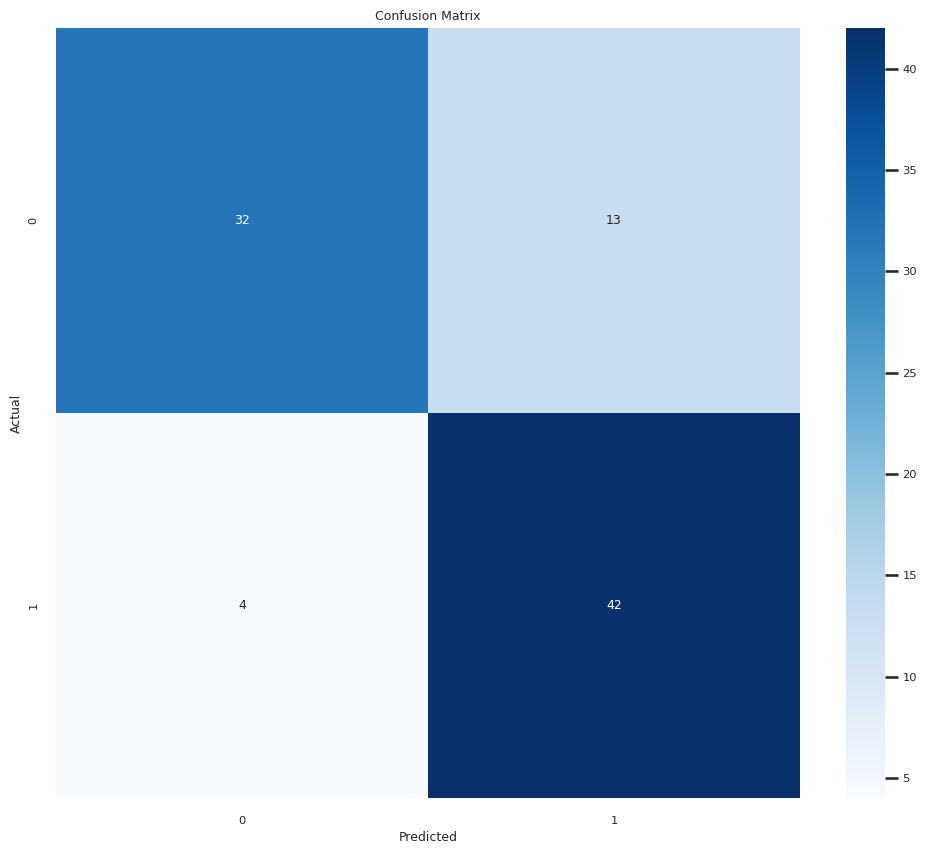

In [152]:
from sklearn.metrics import confusion_matrix
# Test veri seti üzerinde tahmin yapma
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Karşılaştırma matrisini görselleştirme
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**SVM ile karşılaştırma**

Doğruluk Oranı: 0.7032967032967034


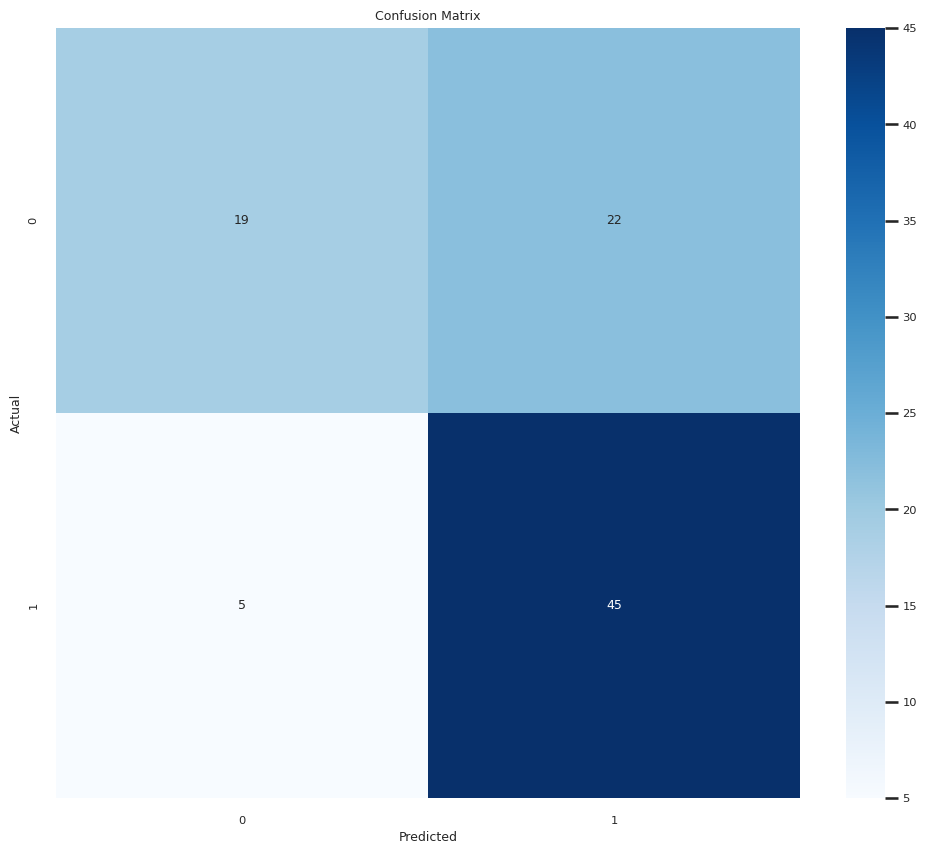

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Eğitim ve test veri setlerini oluşturma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVC sınıflandırıcı modelini oluştur ve eğitme
clf = SVC()
clf.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yapma
y_pred = clf.predict(X_test)

# Doğruluk oranını hesapla
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk Oranı:", accuracy)

# Karşılaştırma matrisini hesaplama
cm = confusion_matrix(y_test, y_pred)

# Karşılaştırma matrisini görselleştirme
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
